In [94]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.tsa.filters.hp_filter import hpfilter
import statsmodels.api as sm
import yfinance as yf

In [104]:
#Verileri Ekledim
from google.colab import drive
drive.mount('/content/drive')
dollars_exchange_df  = pd.read_csv("/content/drive/My Drive/SeminerData/USD_TRY Geçmiş Verileri.csv")
euro_exchange_df  = pd.read_csv("/content/drive/My Drive/SeminerData/EUR_TRY Geçmiş Verileri.csv")
TuikData  = pd.read_csv("/content/drive/My Drive/SeminerData/TuikData2.csv")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
#Dataframe Bilgileri
dollars_exchange_df.info()
euro_exchange_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3359 entries, 0 to 3358
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Tarih   3359 non-null   object 
 1   Şimdi   3359 non-null   object 
 2   Açılış  3359 non-null   object 
 3   Yüksek  3359 non-null   object 
 4   Düşük   3359 non-null   object 
 5   Hac.    0 non-null      float64
 6   Fark %  3359 non-null   object 
dtypes: float64(1), object(6)
memory usage: 183.8+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2609 entries, 0 to 2608
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Tarih   2609 non-null   object 
 1   Şimdi   2609 non-null   object 
 2   Açılış  2609 non-null   object 
 3   Yüksek  2609 non-null   object 
 4   Düşük   2609 non-null   object 
 5   Hac.    0 non-null      float64
 6   Fark %  2609 non-null   object 
dtypes: float64(1), object(6)
memory usage: 142.8+ KB


In [7]:
#2013-2023 Arası Günlük Dolar Kurunu Gösteren Veri
dollars_exchange_df


,Tarih,Şimdi,Açılış,Yüksek,Düşük,Hac.,Fark %
0,30.12.2022,"18,6905","18,6960","18,7238","18,5262",NaN,"0,01%"
1,29.12.2022,"18,6877","18,7028","18,7504","18,6691",NaN,"-0,12%"
2,29.12.2022,"18,7096","18,7319","18,7464","18,5486",NaN,"0,11%"
3,28.12.2022,"18,6889","18,7009","18,7467","18,6688",NaN,"-0,16%"
4,28.12.2022,"18,7180","18,6692","18,7465","18,4954",NaN,"0,22%"
...,...,...,...,...,...,...,...
3354,07.01.2013,"1,7798","1,7826","1,7881","1,7770",NaN,"-0,11%"
3355,04.01.2013,"1,7818","1,7851","1,7926","1,7818",NaN,"-0,16%"
3356,03.01.2013,"1,7847","1,7787","1,7862","1,7756",NaN,"0,34%"
3357,02.01.2013,"1,7787","1,7838","1,7854","1,7750",NaN,"-0,29%"


In [8]:
df = pd.DataFrame(dollars_exchange_df)
df['Tarih'] = pd.to_datetime(df['Tarih'], format='%d.%m.%Y')
if ',' in str(df['Şimdi'].iloc[0]):
    df['Şimdi'] = df['Şimdi'].str.replace(',', '.').astype(float)

# Belirli bir tarih aralığını seçelim
start_date = '2013-01-01'
end_date = '2022-12-30'
selected_data = df.loc[(df['Tarih'] >= start_date) & (df['Tarih'] <= end_date)]

# Çeyrekliklerdeki normal kuru hesaplayan fonksiyon
def calculate_quarterly_mean(data):
    quarterly_data = data.set_index('Tarih').resample('Q').mean(numeric_only=True)
    return quarterly_data

# Çeyrekliklerdeki normal kurun hesaplanması
dollars_quarterly_means = calculate_quarterly_mean(dollars_exchange_df)

print(dollars_quarterly_means)

                Şimdi  Hac.
Tarih                      
2013-03-31   1.785427   NaN
2013-06-30   1.839143   NaN
2013-09-30   1.968797   NaN
2013-12-31   2.025153   NaN
2014-03-31   2.214245   NaN
2014-06-30   2.111592   NaN
2014-09-30   2.163745   NaN
2014-12-31   2.262641   NaN
2015-03-31   2.464270   NaN
2015-06-30   2.664875   NaN
2015-09-30   2.855556   NaN
2015-12-31   2.907550   NaN
2016-03-31   2.941357   NaN
2016-06-30   2.897952   NaN
2016-09-30   2.966609   NaN
2016-12-31   3.293663   NaN
2017-03-31   3.694371   NaN
2017-06-30   3.577342   NaN
2017-09-30   3.512895   NaN
2017-12-31   3.801755   NaN
2018-03-31   3.817212   NaN
2018-06-30   4.373655   NaN
2018-09-30   5.659031   NaN
2018-12-31   5.499506   NaN
2019-03-31   5.364261   NaN
2019-06-30   5.872934   NaN
2019-09-30   5.675033   NaN
2019-12-31   5.808991   NaN
2020-03-31   6.115953   NaN
2020-06-30   6.864225   NaN
2020-09-30   7.234886   NaN
2020-12-31   7.862767   NaN
2021-03-31   7.408288   NaN
2021-06-30   8.39643

In [9]:
df = pd.DataFrame(dollars_exchange_df)
df['Tarih'] = pd.to_datetime(df['Tarih'], format='%d.%m.%Y')
if ',' in str(df['Şimdi'].iloc[0]):
    df['Şimdi'] = df['Şimdi'].str.replace(',', '.').astype(float)

# Belirli bir tarih aralığını seçelim
start_date = '2013-01-01'
end_date = '2022-12-31'
selected_data = df.loc[(df['Tarih'] >= start_date) & (df['Tarih'] <= end_date)]

# Aylık ortalama hesaplayan fonksiyon
def calculate_monthly_mean(data):
    monthly_data = data.set_index('Tarih').resample('M').mean(numeric_only=True)
    return monthly_data

# Aylık ortalamanın hesaplanması
dollars_monthly_means = calculate_monthly_mean(selected_data)

print(dollars_monthly_means)

                Şimdi  Hac.
Tarih                      
2013-01-31   1.770617   NaN
2013-02-28   1.778255   NaN
2013-03-31   1.808476   NaN
2013-04-30   1.796359   NaN
2013-05-31   1.826935   NaN
...               ...   ...
2022-08-31  18.015745   NaN
2022-09-30  18.313974   NaN
2022-10-31  18.577945   NaN
2022-11-30  18.586533   NaN
2022-12-31  18.649331   NaN

[120 rows x 2 columns]


In [10]:
with pd.option_context('display.max_rows', None):
    print(dollars_monthly_means['Şimdi'])


Tarih
2013-01-31     1.770617
2013-02-28     1.778255
2013-03-31     1.808476
2013-04-30     1.796359
2013-05-31     1.826935
2013-06-30     1.900245
2013-07-31     1.931613
2013-08-31     1.963064
2013-09-30     2.015529
2013-10-31     1.984643
2013-11-30     2.025224
2013-12-31     2.067436
2014-01-31     2.219974
2014-02-28     2.208770
2014-03-31     2.213186
2014-04-30     2.125214
2014-05-31     2.090259
2014-06-30     2.119671
2014-07-31     2.119370
2014-08-31     2.160238
2014-09-30     2.213486
2014-10-31     2.252413
2014-11-30     2.233870
2014-12-31     2.297887
2015-01-31     2.336455
2015-02-28     2.465425
2015-03-31     2.591036
2015-04-30     2.653236
2015-05-31     2.643324
2015-06-30     2.697086
2015-07-31     2.700257
2015-08-31     2.856329
2015-09-30     3.017177
2015-10-31     2.924018
2015-11-30     2.876000
2015-12-31     2.920604
2016-01-31     3.007100
2016-02-29     2.943981
2016-03-31     2.878935
2016-04-30     2.833214
2016-05-31     2.946245
2016-06-30

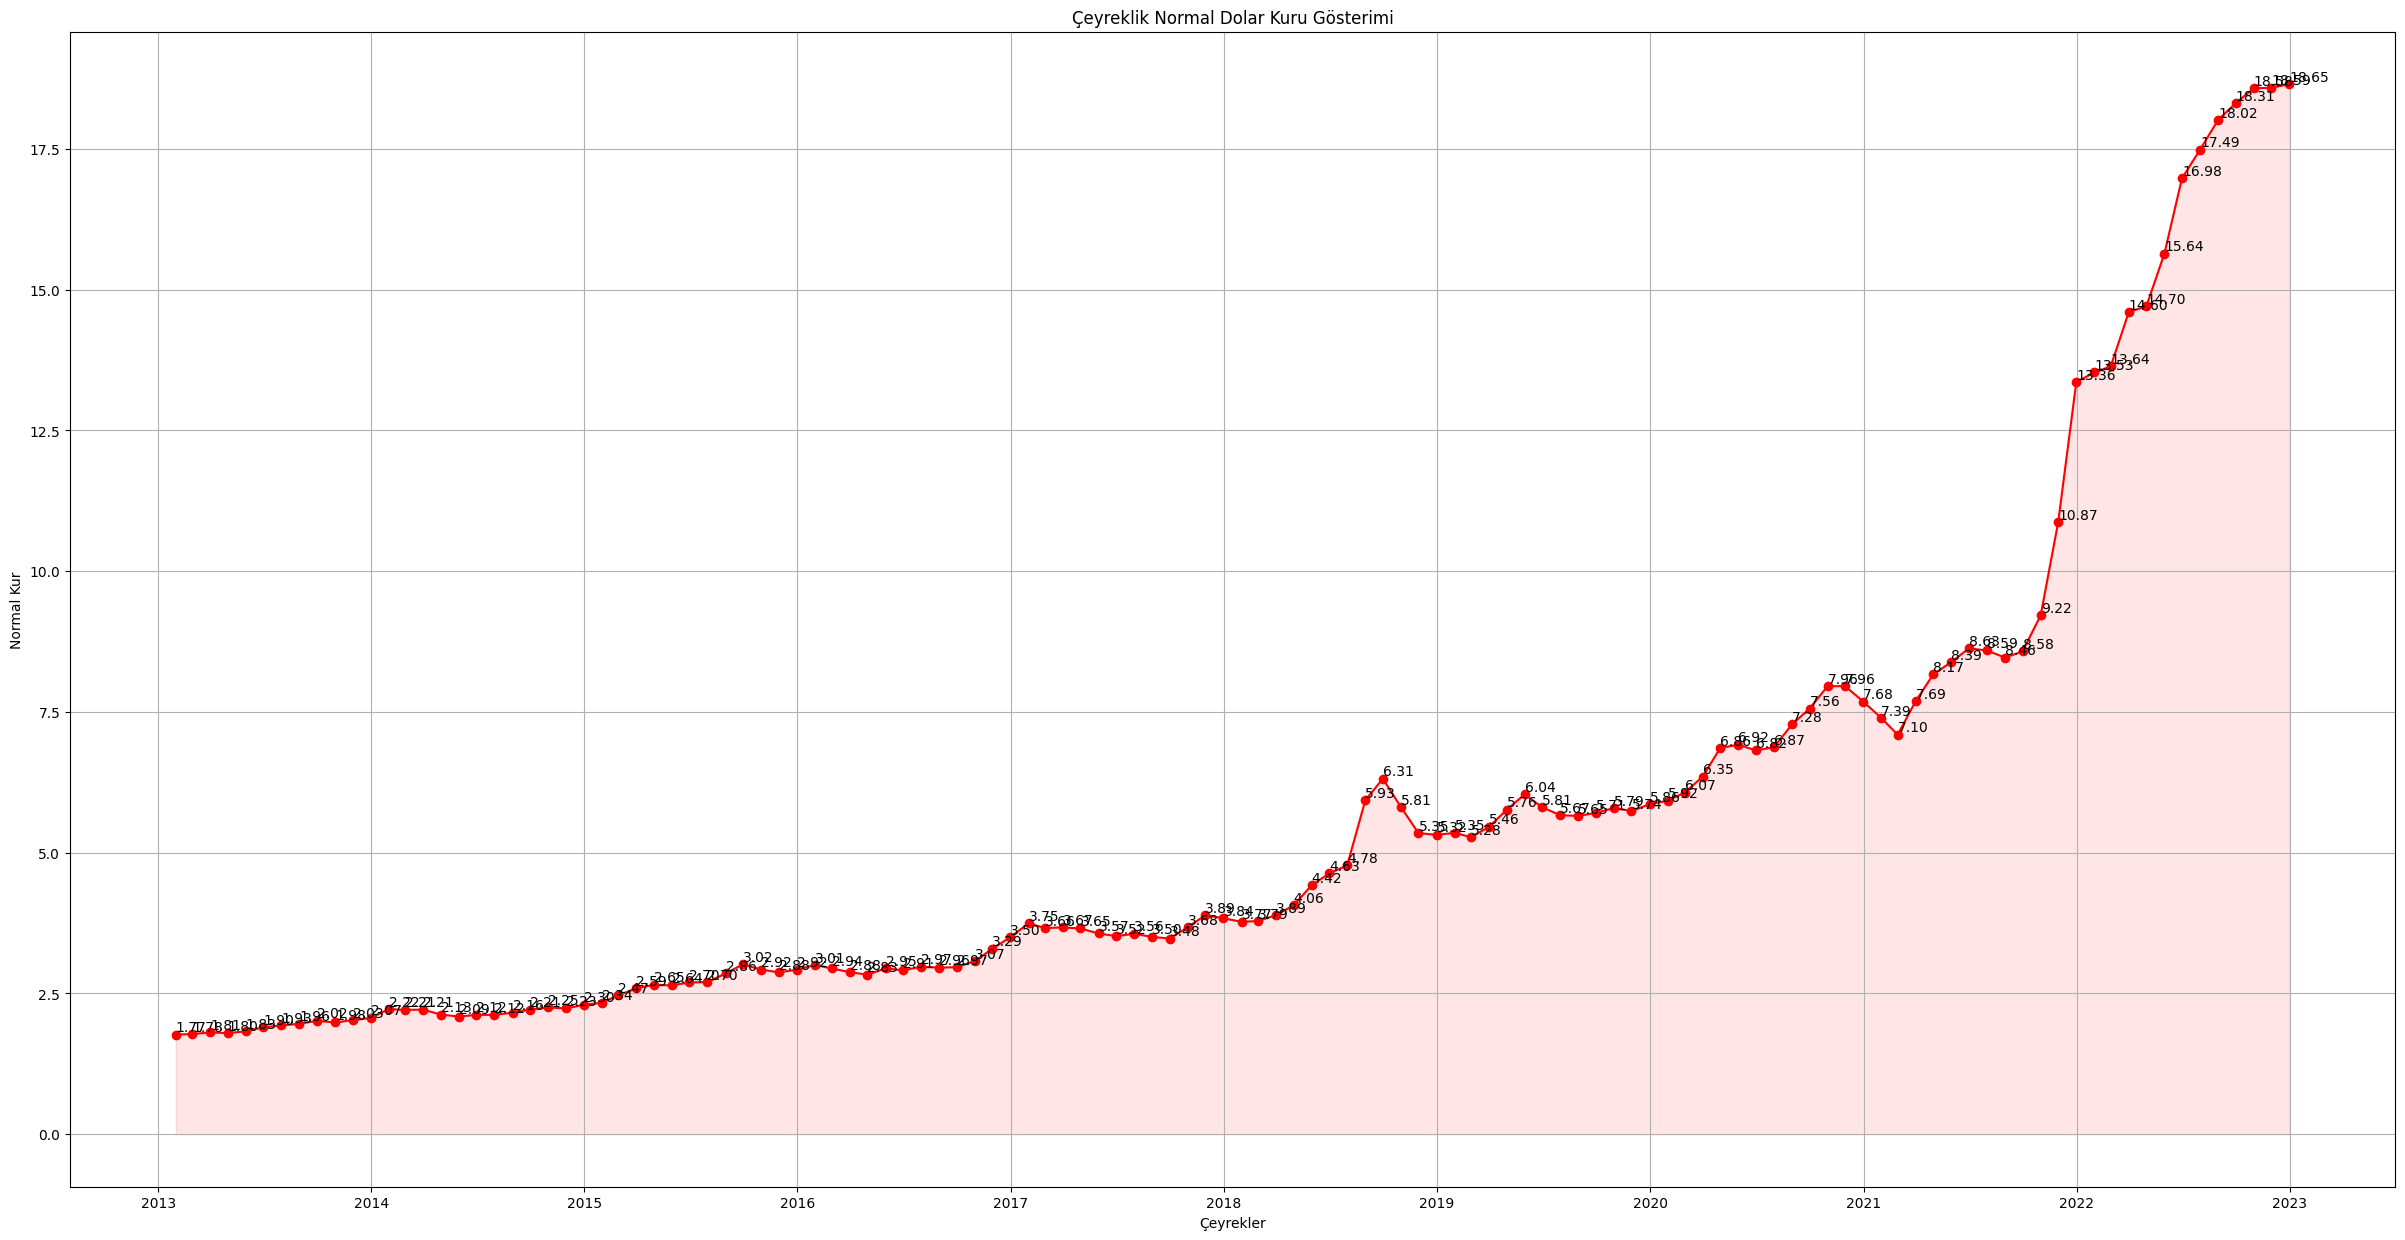

In [11]:
plt.figure(figsize=(30, 15))
plt.plot(dollars_monthly_means.index, dollars_monthly_means['Şimdi'], marker='o', linestyle='-', color = 'red')
plt.title('Çeyreklik Normal Dolar Kuru Gösterimi')
plt.xlabel('Çeyrekler')
plt.ylabel('Normal Kur')

for i, value in enumerate(dollars_monthly_means['Şimdi']):
    plt.text(dollars_monthly_means.index[i], value, f'{value:.2f}', ha='left', va='bottom')

plt.fill_between(dollars_monthly_means.index, dollars_monthly_means['Şimdi'], color='red', alpha=0.1, label='Alan Rengi')


plt.grid(True)
plt.show()

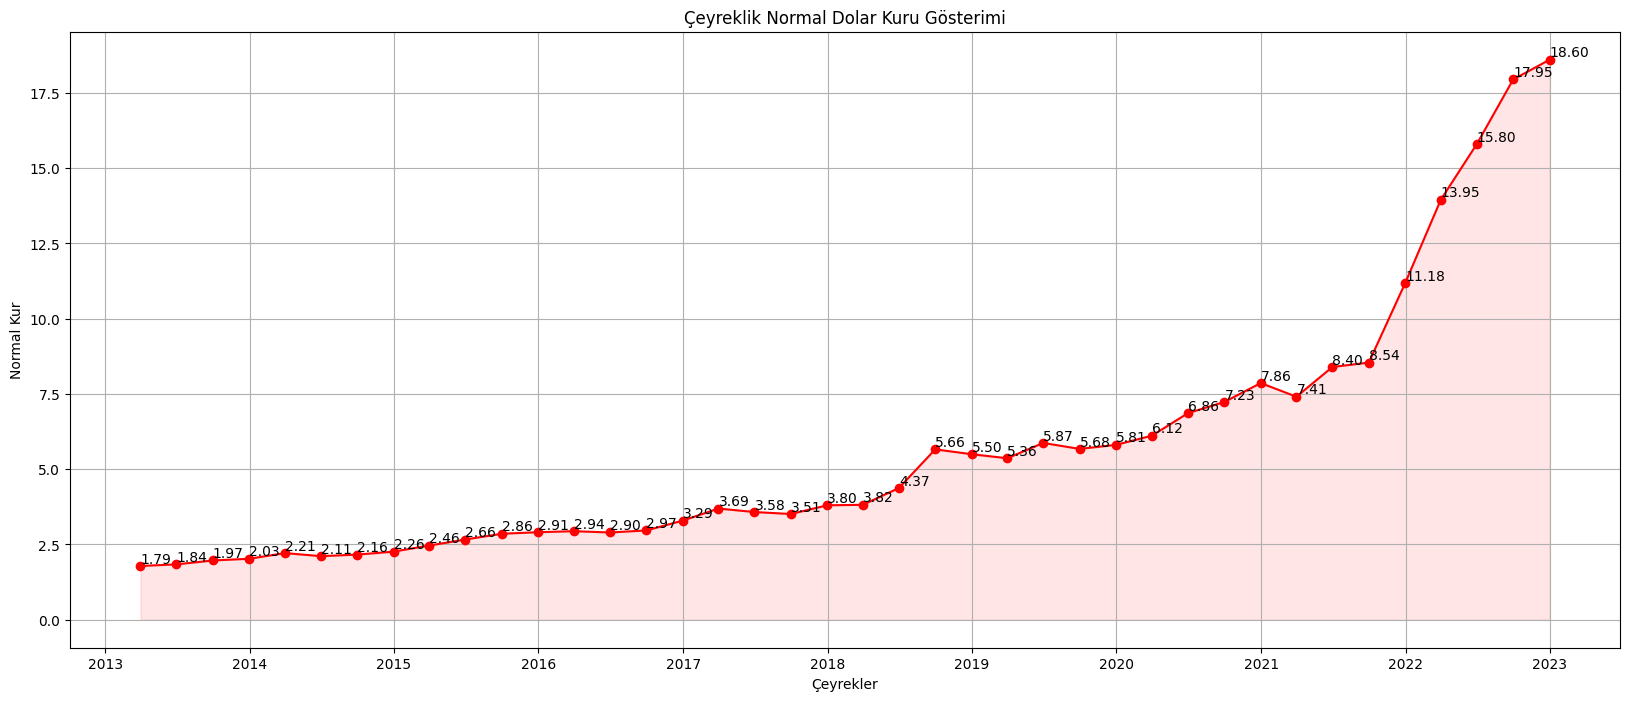

In [12]:
plt.figure(figsize=(20, 8))
plt.plot(dollars_quarterly_means.index, dollars_quarterly_means['Şimdi'], marker='o', linestyle='-', color = 'red')
plt.title('Çeyreklik Normal Dolar Kuru Gösterimi')
plt.xlabel('Çeyrekler')
plt.ylabel('Normal Kur')

for i, value in enumerate(dollars_quarterly_means['Şimdi']):
    plt.text(dollars_quarterly_means.index[i], value, f'{value:.2f}', ha='left', va='bottom')

plt.fill_between(dollars_quarterly_means.index, dollars_quarterly_means['Şimdi'], color='red', alpha=0.1, label='Alan Rengi')


plt.grid(True)
plt.show()

In [13]:
print(dollars_quarterly_means.index, dollars_quarterly_means)

DatetimeIndex(['2013-03-31', '2013-06-30', '2013-09-30', '2013-12-31',
               '2014-03-31', '2014-06-30', '2014-09-30', '2014-12-31',
               '2015-03-31', '2015-06-30', '2015-09-30', '2015-12-31',
               '2016-03-31', '2016-06-30', '2016-09-30', '2016-12-31',
               '2017-03-31', '2017-06-30', '2017-09-30', '2017-12-31',
               '2018-03-31', '2018-06-30', '2018-09-30', '2018-12-31',
               '2019-03-31', '2019-06-30', '2019-09-30', '2019-12-31',
               '2020-03-31', '2020-06-30', '2020-09-30', '2020-12-31',
               '2021-03-31', '2021-06-30', '2021-09-30', '2021-12-31',
               '2022-03-31', '2022-06-30', '2022-09-30', '2022-12-31'],
              dtype='datetime64[ns]', name='Tarih', freq='Q-DEC')                 Şimdi  Hac.
Tarih                      
2013-03-31   1.785427   NaN
2013-06-30   1.839143   NaN
2013-09-30   1.968797   NaN
2013-12-31   2.025153   NaN
2014-03-31   2.214245   NaN
2014-06-30   2.111592   NaN

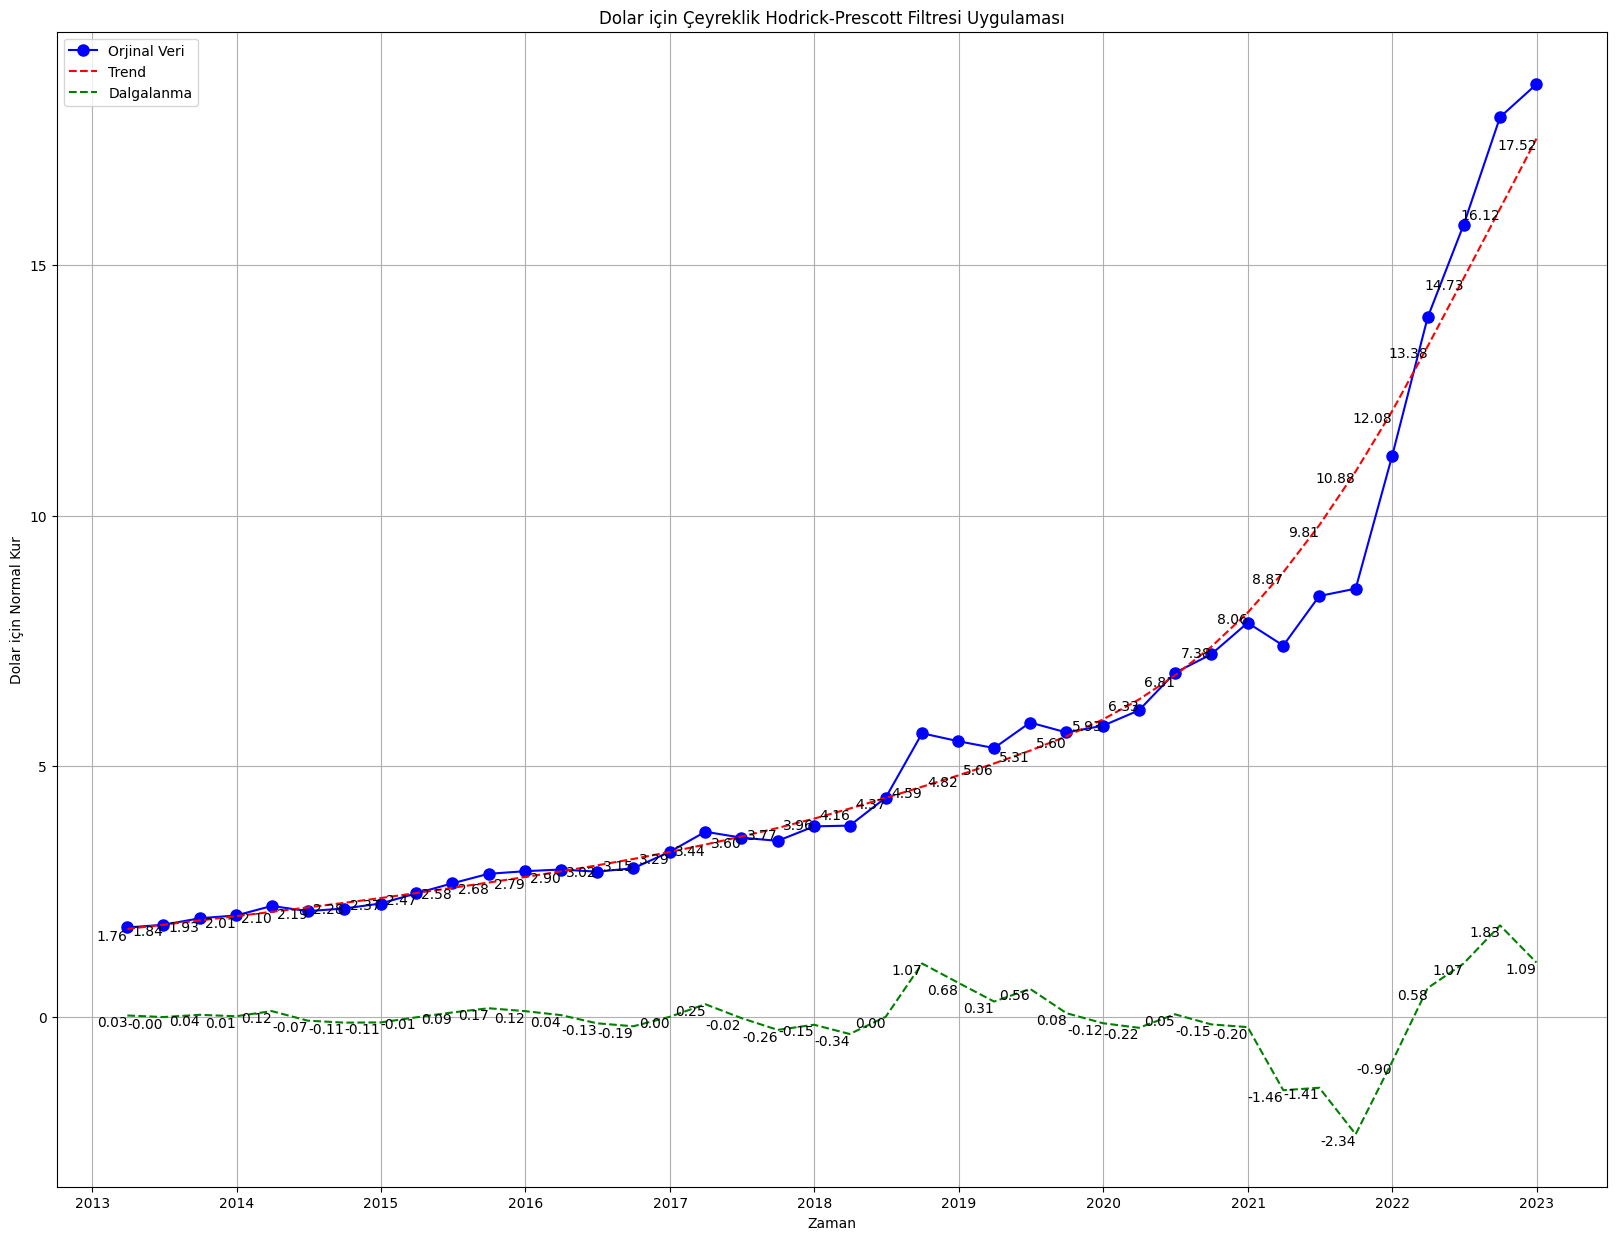

In [14]:
# Hodrick-Prescott filtresi
cycle, trend = sm.tsa.filters.hpfilter(dollars_quarterly_means['Şimdi'], lamb=129.600)

plt.figure(figsize=(20, 15))

# Orjinal veri
plt.plot(dollars_quarterly_means.index, dollars_quarterly_means['Şimdi'], label='Orjinal Veri', marker='o', linestyle='-', color='blue', markersize=8)

# Trend
plt.plot(dollars_quarterly_means.index, trend, label='Trend', linestyle='--', color='red')

# Dalgalanma
plt.plot(dollars_quarterly_means.index, cycle, label='Dalgalanma', linestyle='--', color='green')

# Başlık ve etiketler
plt.title('Dolar için Çeyreklik Hodrick-Prescott Filtresi Uygulaması')
plt.xlabel('Zaman')
plt.ylabel('Dolar için Normal Kur')

# Detaylar
for i, value in enumerate(trend):
    plt.text(dollars_quarterly_means.index[i], value, f'{value:.2f}', ha='right', va='top')

for i, value in enumerate(cycle):
    plt.text(dollars_quarterly_means.index[i], value, f'{value:.2f}', ha='right', va='top')


# Etiketler
plt.legend()

plt.grid(True)
plt.show()

In [15]:
#2013-2023 Arası Günlük Euro Kurunu Gösteren Veri
euro_exchange_df


,Tarih,Şimdi,Açılış,Yüksek,Düşük,Hac.,Fark %
0,30.12.2022,"20,0002","19,9501","20,0696","19,8132",NaN,"0,35%"
1,29.12.2022,"19,9298","19,8636","20,0313","19,7582",NaN,"0,39%"
2,28.12.2022,"19,8519","19,9028","20,0369","19,7383",NaN,"-0,03%"
3,27.12.2022,"19,8578","19,8791","20,0578","19,7607",NaN,"0,06%"
4,26.12.2022,"19,8468","19,8118","19,9733","19,6908",NaN,"0,19%"
...,...,...,...,...,...,...,...
2604,07.01.2013,"2,3351","2,3289","2,3376","2,3155",NaN,"0,26%"
2605,04.01.2013,"2,3291","2,3271","2,3348","2,3196",NaN,"-0,02%"
2606,03.01.2013,"2,3296","2,3438","2,3493","2,3226",NaN,"-0,68%"
2607,02.01.2013,"2,3455","2,3520","2,3688","2,3381",NaN,"-0,32%"


In [16]:
df = pd.DataFrame(euro_exchange_df)
df['Tarih'] = pd.to_datetime(df['Tarih'], format='%d.%m.%Y')
if ',' in str(df['Şimdi'].iloc[0]):
    df['Şimdi'] = df['Şimdi'].str.replace(',', '.').astype(float)

# Çeyrekliklerdeki normal kurun hesaplanması
euro_quarterly_means = calculate_quarterly_mean(euro_exchange_df)

print(euro_quarterly_means)

                Şimdi  Hac.
Tarih                      
2013-03-31   2.356248   NaN
2013-06-30   2.402631   NaN
2013-09-30   2.610630   NaN
2013-12-31   2.757432   NaN
2014-03-31   3.034341   NaN
2014-06-30   2.896395   NaN
2014-09-30   2.866398   NaN
2014-12-31   2.825326   NaN
2015-03-31   2.772839   NaN
2015-06-30   2.950085   NaN
2015-09-30   3.178430   NaN
2015-12-31   3.184670   NaN
2016-03-31   3.246985   NaN
2016-06-30   3.272469   NaN
2016-09-30   3.311591   NaN
2016-12-31   3.545971   NaN
2017-03-31   3.936238   NaN
2017-06-30   3.938466   NaN
2017-09-30   4.128274   NaN
2017-12-31   4.477660   NaN
2018-03-31   4.690343   NaN
2018-06-30   5.205146   NaN
2018-09-30   6.579006   NaN
2018-12-31   6.275198   NaN
2019-03-31   6.091730   NaN
2019-06-30   6.593318   NaN
2019-09-30   6.304548   NaN
2019-12-31   6.417697   NaN
2020-03-31   6.734882   NaN
2020-06-30   7.555857   NaN
2020-09-30   8.452656   NaN
2020-12-31   9.377120   NaN
2021-03-31   8.915034   NaN
2021-06-30  10.10512

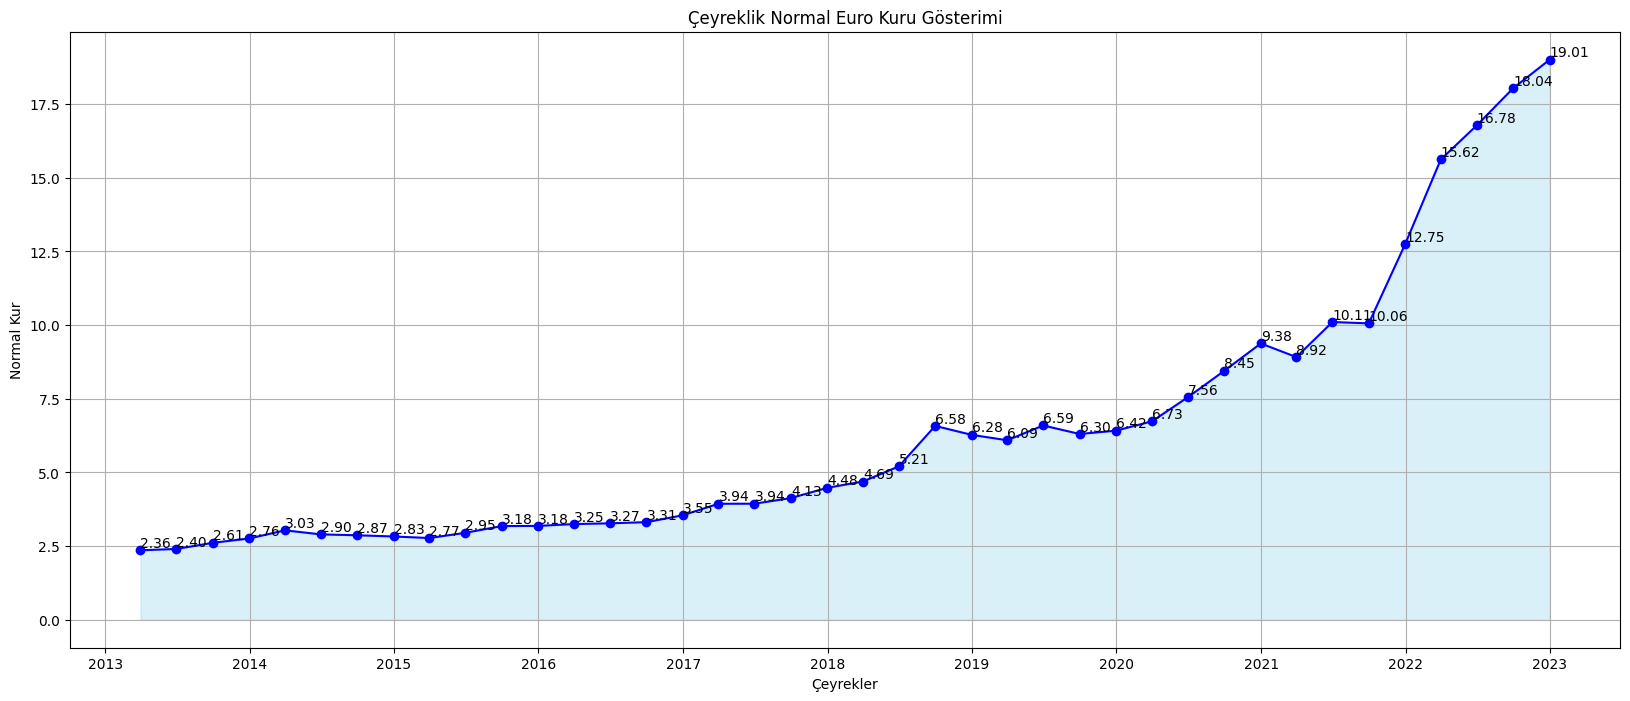

In [17]:
plt.figure(figsize=(20, 8))
plt.plot(euro_quarterly_means.index, euro_quarterly_means['Şimdi'], marker='o', linestyle='-', color = 'blue')
plt.title('Çeyreklik Normal Euro Kuru Gösterimi')
plt.xlabel('Çeyrekler')
plt.ylabel('Normal Kur')
plt.grid(True)

for i, value in enumerate(euro_quarterly_means['Şimdi']):
    plt.text(euro_quarterly_means.index[i], value, f'{value:.2f}', ha='left', va='bottom')

plt.fill_between(euro_quarterly_means.index, euro_quarterly_means['Şimdi'], color='skyblue', alpha=0.3, label='Alan Rengi')


plt.show()

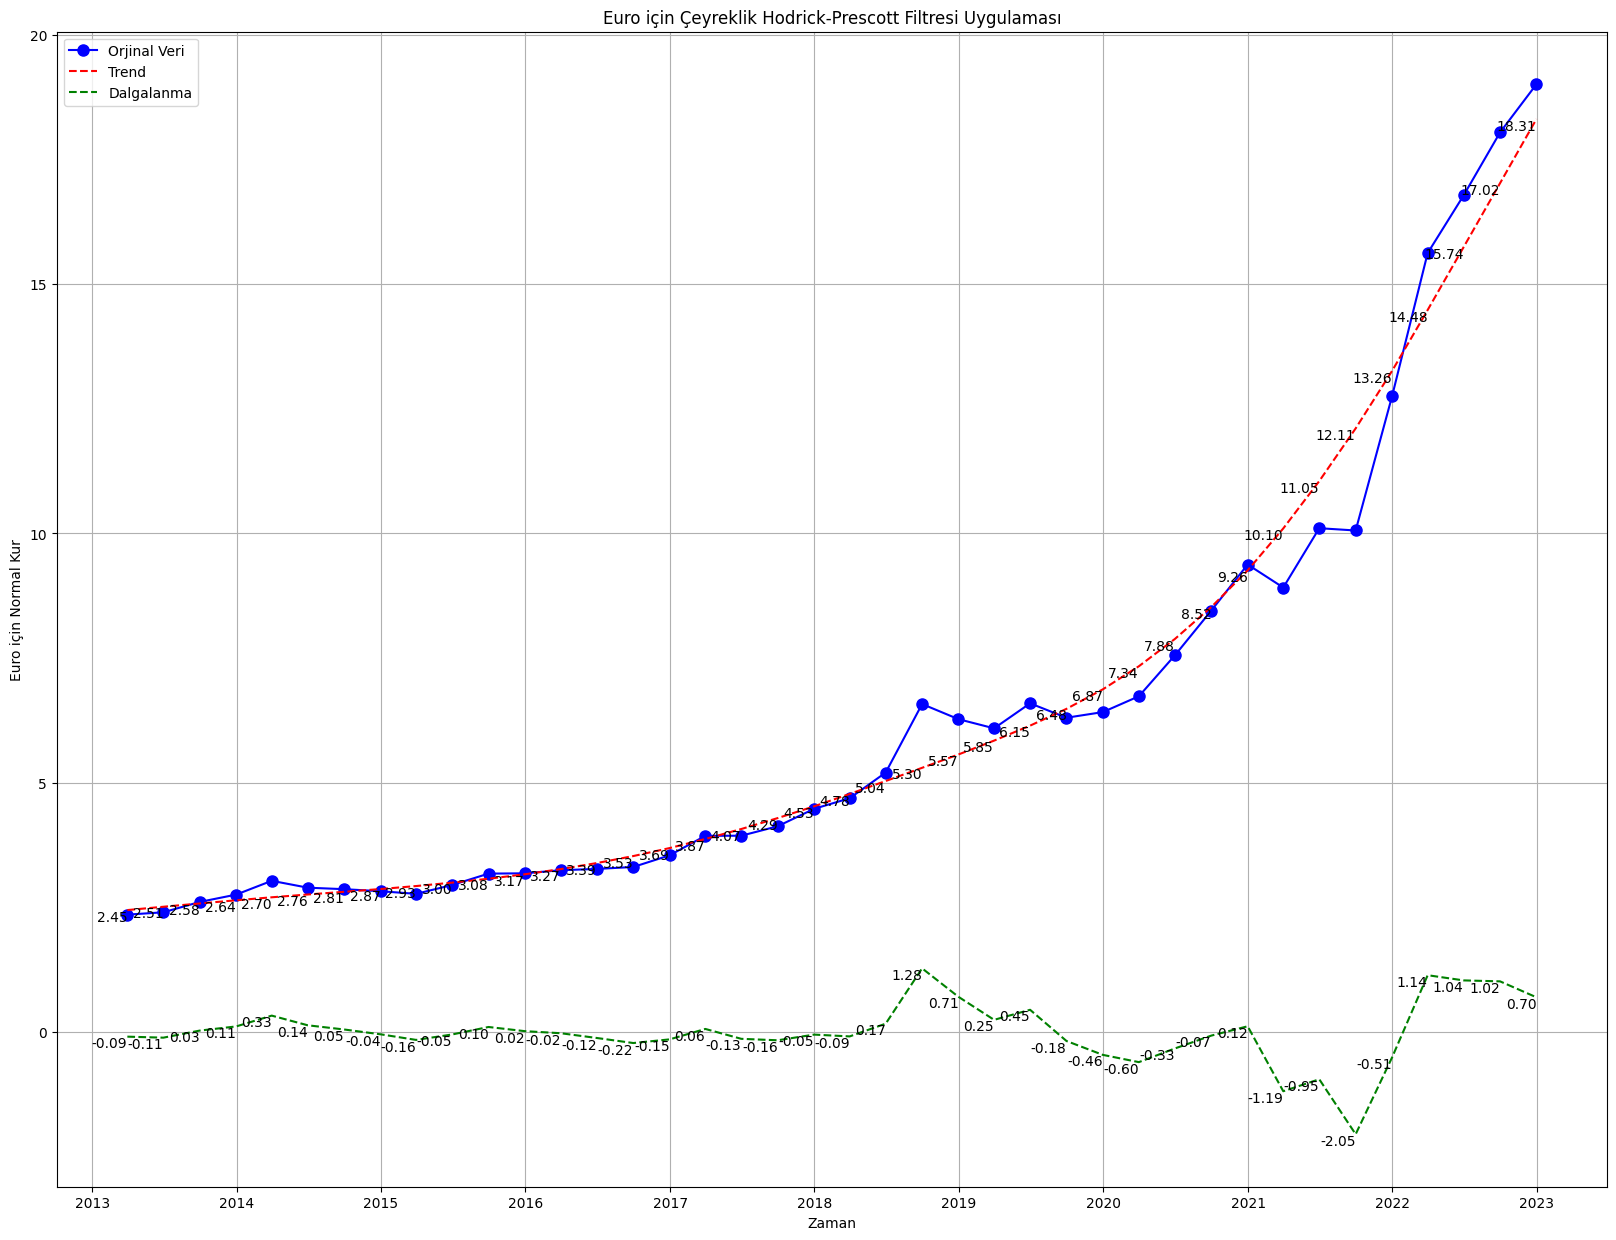

In [18]:
# Hodrick-Prescott filtresi
cycle, trend = sm.tsa.filters.hpfilter(euro_quarterly_means['Şimdi'], lamb=129.600)

plt.figure(figsize=(20, 15))

# Orjinal veri
plt.plot(euro_quarterly_means.index, euro_quarterly_means['Şimdi'], label='Orjinal Veri', marker='o', linestyle='-', color='blue', markersize=8)

# Trend
plt.plot(euro_quarterly_means.index, trend, label='Trend', linestyle='--', color='red')

# Dalgalanma
plt.plot(euro_quarterly_means.index, cycle, label='Dalgalanma', linestyle='--', color='green')

# Başlık ve etiketler
plt.title('Euro için Çeyreklik Hodrick-Prescott Filtresi Uygulaması')
plt.xlabel('Zaman')
plt.ylabel('Euro için Normal Kur')

# Detaylar
for i, value in enumerate(trend):
    plt.text(euro_quarterly_means.index[i], value, f'{value:.2f}', ha='right', va='top')

for i, value in enumerate(cycle):
    plt.text(euro_quarterly_means.index[i], value, f'{value:.2f}', ha='right', va='top')


# Etiketler
plt.legend()

plt.grid(True)
plt.show()

In [78]:
TuikData

,Date,ExportsValue,ExportsChange(%),ImportsValue,ImportsChange(%),BalanceValue,BalanceChange(%),VolumeofTradeValue,VolumeofTradeChange(%),Proportion of imports covered by exports (%),ExchangeRate($)
0,01-2013,12 263 324,NaN,19 564 482,NaN,-7 301 158,NaN,31 827 807,NaN,62.7,1.770617
1,02-2013,13 155 176,NaN,20 345 696,NaN,-7 190 521,NaN,33 500 872,NaN,64.7,1.778255
2,03-2013,14 066 304,NaN,21 322 812,NaN,-7 256 508,NaN,35 389 116,NaN,66.0,1.808476
3,04-2013,13 450 015,NaN,23 688 345,NaN,-10 238 330,NaN,37 138 359,NaN,56.8,1.796359
4,05-2013,14 141 543,NaN,23 838 797,NaN,-9 697 255,NaN,37 980 340,NaN,59.3,1.826935
...,...,...,...,...,...,...,...,...,...,...,...
116,09-2022,22 596 774,9.1,32 203 936,38.1,-9 607 162,268.6,54 800 711,24.4,70.2,18.313974
117,10-2022,21 300 785,2.8,29 202 395,31.4,-7 901 610,423.5,50 503 180,17.6,72.9,18.577945
118,11-2022,21 871 039,1.9,30 655 219,14.0,-8 784 181,61.3,52 526 258,8.6,71.3,18.586533
119,12-2022,22 898 749,3.0,32 611 552,12.2,-9 712 803,42.2,55 510 301,8.2,70.2,18.649331


In [105]:
#Let's find our delta_e

# Convert 'Date' column to datetime
TuikData['Date'] = pd.to_datetime(TuikData['Date'], errors='coerce', format='%m-%Y')

# Drop rows with NaT (Not a Time) values, which correspond to the problematic rows
TuikData = TuikData.dropna(subset=['Date'])

# Sort the DataFrame based on the 'Date' column
TuikData = TuikData.sort_values(by='Date')

# Calculate ExchangeRateChange using the shift function
TuikData['ExchangeRateChange'] = TuikData['ExchangeRate($)'].pct_change()

# Display the modified DataFrame
print(TuikData['ExchangeRateChange'])




0           NaN
1      0.004314
2      0.016995
3     -0.006700
4      0.017021
         ...   
115    0.030241
116    0.016554
117    0.014414
118    0.000462
119    0.003379
Name: ExchangeRateChange, Length: 119, dtype: float64


In [111]:
TuikData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 119 entries, 0 to 119
Data columns (total 12 columns):
 #   Column                                        Non-Null Count  Dtype         
---  ------                                        --------------  -----         
 0   Date                                          119 non-null    datetime64[ns]
 1   ExportsValue                                  119 non-null    float64       
 2   ExportsChange(%)                              107 non-null    float64       
 3   ImportsValue                                  119 non-null    float64       
 4   ImportsChange(%)                              107 non-null    float64       
 5   BalanceValue                                  119 non-null    float64       
 6   BalanceChange(%)                              107 non-null    float64       
 7   VolumeofTradeValue                            119 non-null    float64       
 8   VolumeofTradeChange(%)                        107 non-null    float64 

In [110]:
#VERY IMPORTANT CODE PART!!!! IT WORKS DON'T MIND ABOUT THE ERROR CODE. IT ONLY WORKS ONCE!

# Remove commas and spaces from 'ExportsValue', 'ImportsValue', 'BalanceValue', and 'VolumeofTradeValue'
TuikData['ExportsValue'] = TuikData['ExportsValue'].str.replace(' ', '').str.replace(',', '').astype(float)
TuikData['ImportsValue'] = TuikData['ImportsValue'].str.replace(' ', '').str.replace(',', '').astype(float)
TuikData['BalanceValue'] = TuikData['BalanceValue'].str.replace(' ', '').str.replace(',', '').astype(float)
TuikData['VolumeofTradeValue'] = TuikData['VolumeofTradeValue'].str.replace(' ', '').str.replace(',', '').astype(float)

# Convert 'ExportsValue', 'ImportsValue', 'BalanceValue', and 'VolumeofTradeValue' to numeric
TuikData['ExportsValue'] = pd.to_numeric(TuikData['ExportsValue'])
TuikData['ImportsValue'] = pd.to_numeric(TuikData['ImportsValue'])
TuikData['BalanceValue'] = pd.to_numeric(TuikData['BalanceValue'])
TuikData['VolumeofTradeValue'] = pd.to_numeric(TuikData['VolumeofTradeValue'])

# Check the updated DataFrame info
print(TuikData.info())

AttributeError: Can only use .str accessor with string values!

In [116]:
# Create a copy of TuikData to avoid modifying the original DataFrame
dfmodel = TuikData.copy()


# Create a copy of TuikData to avoid modifying the original DataFrame
df = TuikData.copy()

# Drop rows with missing values in any of the specified columns
df = df.dropna(subset=['ExchangeRate($)', 'ExchangeRateChange'])

# Define the dependent variable (y) and independent variables (X)
y = df['VolumeofTradeValue']
X = df[['ExchangeRate($)', 'ExchangeRateChange']]

# Add a constant term to the independent variables
X = sm.add_constant(X)

# Fit the linear regression model
model = sm.OLS(y, X).fit()

# Print the regression results
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:     VolumeofTradeValue   R-squared:                       0.642
Model:                            OLS   Adj. R-squared:                  0.636
Method:                 Least Squares   F-statistic:                     103.2
Date:                Sat, 20 Jan 2024   Prob (F-statistic):           2.19e-26
Time:                        07:04:38   Log-Likelihood:                -1966.0
No. Observations:                 118   AIC:                             3938.
Df Residuals:                     115   BIC:                             3946.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               2.814e+07   6.43

In [117]:

# Create a copy of TuikData to avoid modifying the original DataFrame
df = TuikData.copy()

# Create the new variable tb/y
df['tb_over_y'] = df['BalanceValue'] / df['ExchangeRate($)']

# Drop rows with missing values in any of the specified columns
df = df.dropna(subset=['ExchangeRate($)', 'ExchangeRateChange', 'tb_over_y'])

# Define the dependent variable (y) and independent variables (X)
y = df['VolumeofTradeValue']
X = df[['ExchangeRate($)', 'ExchangeRateChange','tb_over_y']]

# Add a constant term to the independent variables
X = sm.add_constant(X)

# Fit the linear regression model
model = sm.OLS(y, X).fit()

# Print the regression results
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:     VolumeofTradeValue   R-squared:                       0.793
Model:                            OLS   Adj. R-squared:                  0.787
Method:                 Least Squares   F-statistic:                     145.2
Date:                Sat, 20 Jan 2024   Prob (F-statistic):           8.86e-39
Time:                        07:12:04   Log-Likelihood:                -1933.8
No. Observations:                 118   AIC:                             3876.
Df Residuals:                     114   BIC:                             3887.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               2.158e+07   8.73

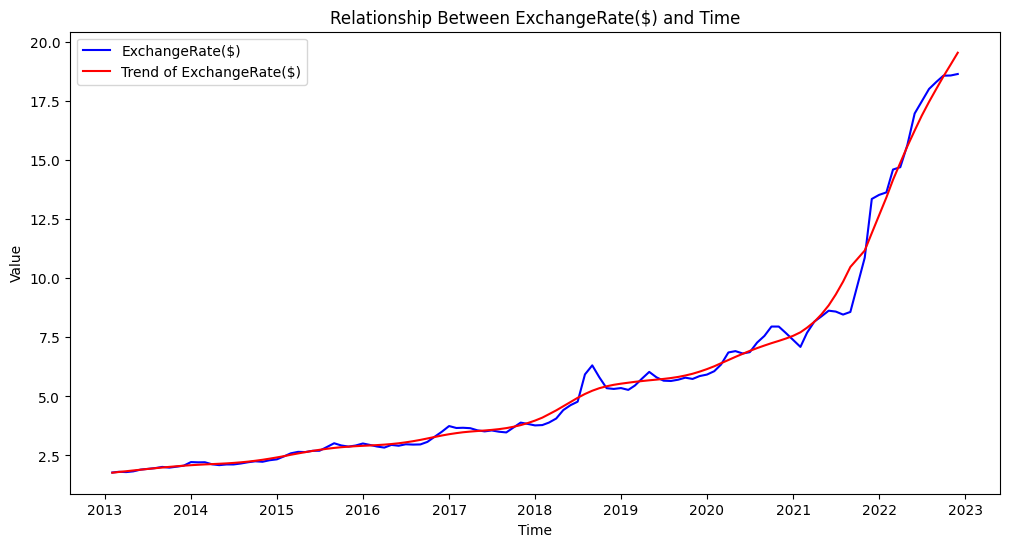

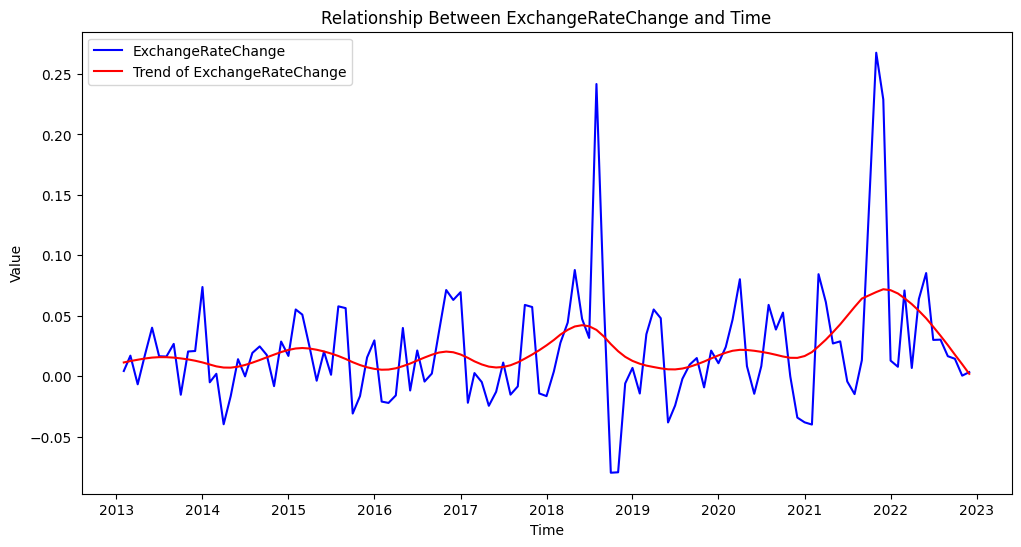

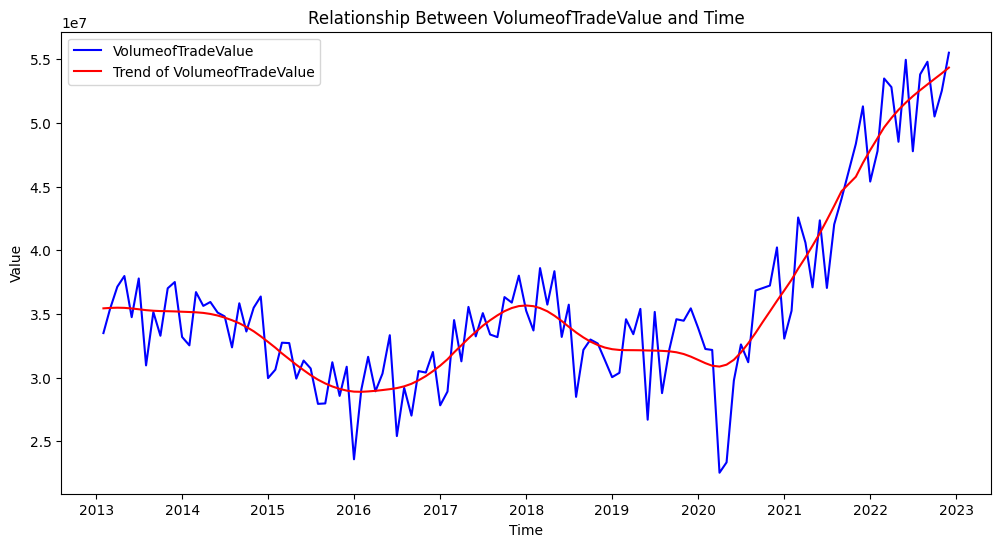

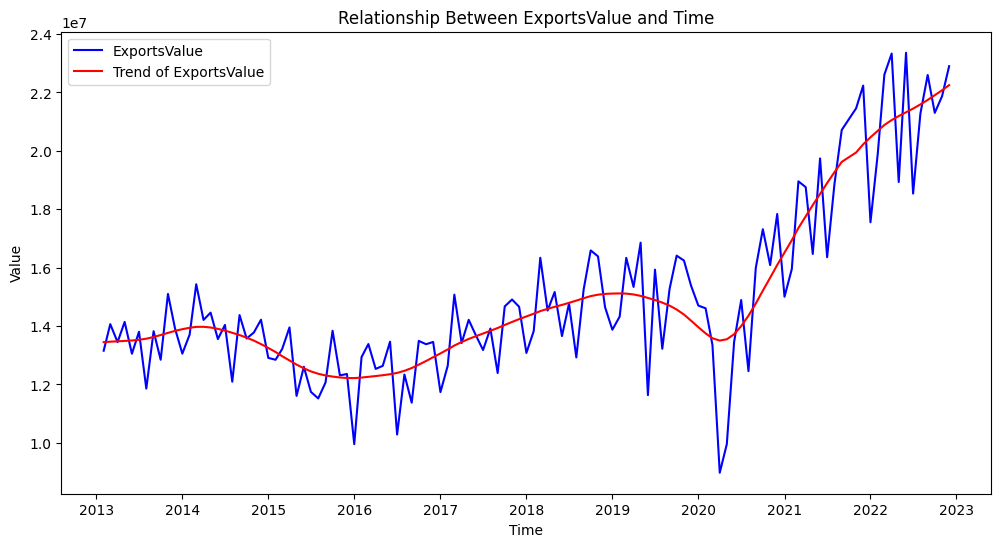

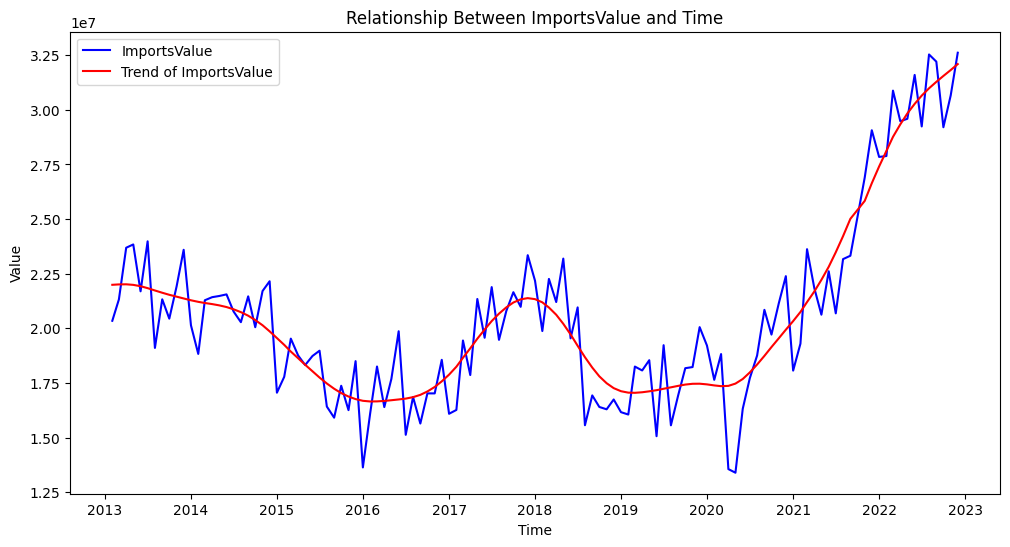

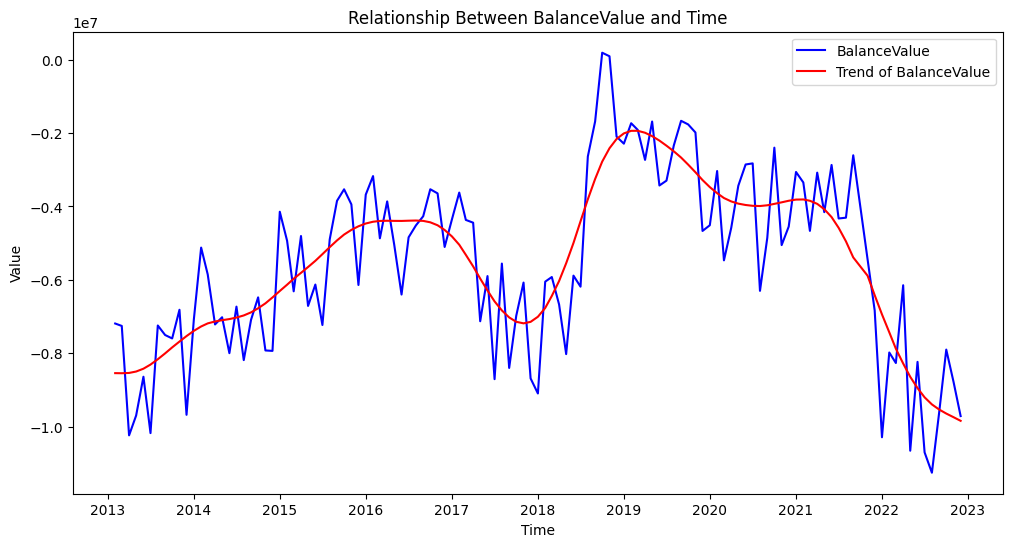

In [123]:
df = TuikData.copy()

# Drop rows with missing values in any of the specified columns
df = df.dropna(subset=['ExchangeRate($)', 'ExchangeRateChange', 'VolumeofTradeValue', 'ExportsValue', 'ImportsValue', 'BalanceValue'])

# Apply Hodrick-Prescott filter to selected variables
for column in ['ExchangeRate($)', 'ExchangeRateChange', 'VolumeofTradeValue', 'ExportsValue', 'ImportsValue', 'BalanceValue']:
    cycle, trend = sm.tsa.filters.hpfilter(df[column], lamb=129.600)

    # Plot the original and trend series
    plt.figure(figsize=(12, 6))
    plt.plot(df['Date'], df[column], label=column, color='blue')
    plt.plot(df['Date'], trend, label=f'Trend of {column}', color='red')

    plt.title(f'Relationship Between {column} and Time')
    plt.xlabel('Time')
    plt.ylabel('Value')
    plt.legend()
    plt.show()


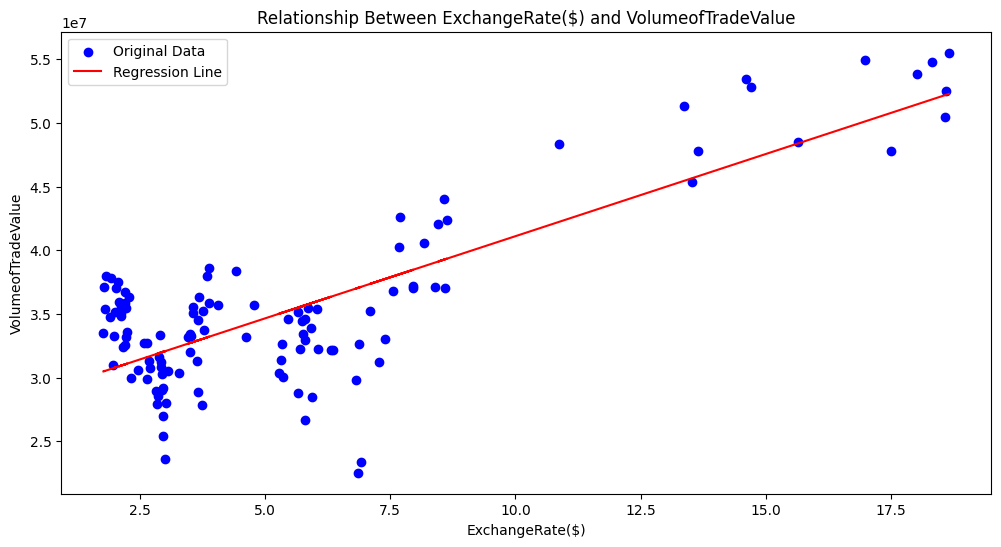

In [124]:


# Drop rows with missing values in the specified columns
df = df.dropna(subset=['ExchangeRate($)', 'VolumeofTradeValue'])

# Fit a simple linear regression model
X = sm.add_constant(df['ExchangeRate($)'])
y = df['VolumeofTradeValue']
model = sm.OLS(y, X).fit()

# Get the predicted values
df['Predicted_VolumeofTrade'] = model.predict(X)

# Plot the original data and the regression line
plt.figure(figsize=(12, 6))
plt.scatter(df['ExchangeRate($)'], df['VolumeofTradeValue'], label='Original Data', color='blue')
plt.plot(df['ExchangeRate($)'], df['Predicted_VolumeofTrade'], label='Regression Line', color='red')

plt.title('Relationship Between ExchangeRate($) and VolumeofTradeValue')
plt.xlabel('ExchangeRate($)')
plt.ylabel('VolumeofTradeValue')
plt.legend()
plt.show()


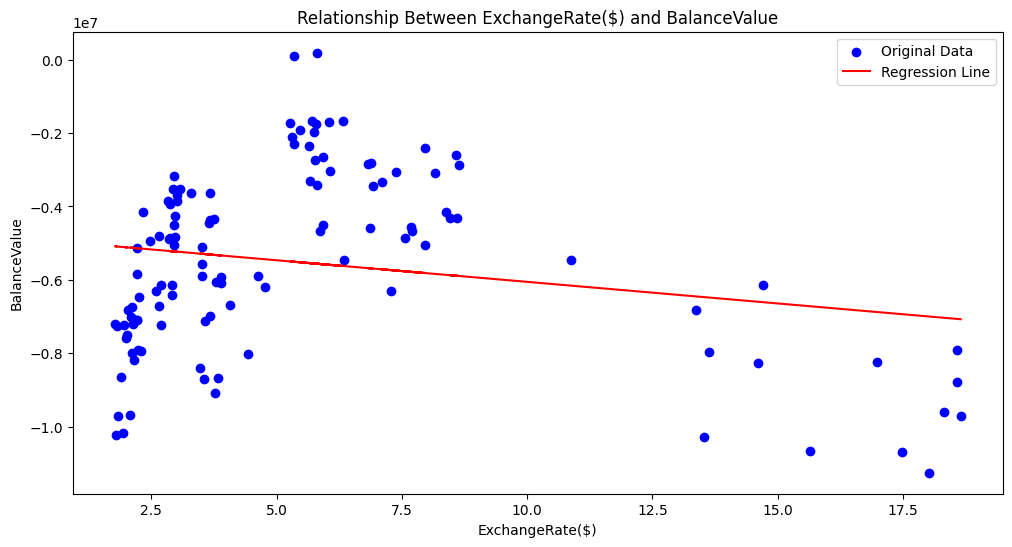

In [126]:
# Drop rows with missing values in the specified columns
df = df.dropna(subset=['ExchangeRate($)', 'BalanceValue'])

# Fit a simple linear regression model
X = sm.add_constant(df['ExchangeRate($)'])
y = df['BalanceValue']
model = sm.OLS(y, X).fit()

# Get the predicted values
df['Predicted_BalanceValue'] = model.predict(X)

# Plot the original data and the regression line
plt.figure(figsize=(12, 6))
plt.scatter(df['ExchangeRate($)'], df['BalanceValue'], label='Original Data', color='blue')
plt.plot(df['ExchangeRate($)'], df['Predicted_BalanceValue'], label='Regression Line', color='red')

plt.title('Relationship Between ExchangeRate($) and BalanceValue')
plt.xlabel('ExchangeRate($)')
plt.ylabel('BalanceValue')
plt.legend()
plt.show()